In [1]:
from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/heart.csv'

import pandas as pd
df = pd.read_csv(ruta_archivo)

df.head()

Mounted at /content/drive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Verificar valores nulos
print(df.isnull().sum())

# Imputación de valores faltantes (usando la mediana para variables numéricas)
numerical_cols = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Normalización de variables numéricas (MinMaxScaler)
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verificar de nuevo valores nulos después de la imputación
print(df.isnull().sum())

# Mostrar las primeras filas del DataFrame preprocesado
df.head()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [3]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
# Asegurando el balanceo con stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar la distribución de la variable objetivo en ambos conjuntos
print("Distribución de la variable objetivo en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de la variable objetivo en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Distribución de la variable objetivo en el conjunto de entrenamiento:
target
1.0    0.545455
0.0    0.454545
Name: proportion, dtype: float64

Distribución de la variable objetivo en el conjunto de prueba:
target
1.0    0.540984
0.0    0.459016
Name: proportion, dtype: float64


In [4]:
#   – Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.
#   – Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.
#   – Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo MLP con Dropout y Early Stopping
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.25))  # Capa de Dropout con una tasa del 25%
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))  # Capa de Dropout con una tasa del 25%
model.add(Dense(1, activation='sigmoid'))  # Capa de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Entrenar el modelo con Early Stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4792 - loss: 0.7206 - val_accuracy: 0.3878 - val_loss: 0.7100
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5215 - loss: 0.7016 - val_accuracy: 0.6531 - val_loss: 0.6560
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5862 - loss: 0.6745 - val_accuracy: 0.8571 - val_loss: 0.6207
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7406 - loss: 0.6226 - val_accuracy: 0.8367 - val_loss: 0.5937
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7526 - loss: 0.6135 - val_accuracy: 0.8367 - val_loss: 0.5706
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6396 - loss: 0.6370 - val_accuracy: 0.8367 - val_loss: 0.5497
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7264 - loss: 0.6055 - val_accuracy: 0.8367 - val_loss: 0.5279
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7398 - loss: 0.5805 - val_accuracy: 0.8571 - val_loss: 0.5030
2/2 

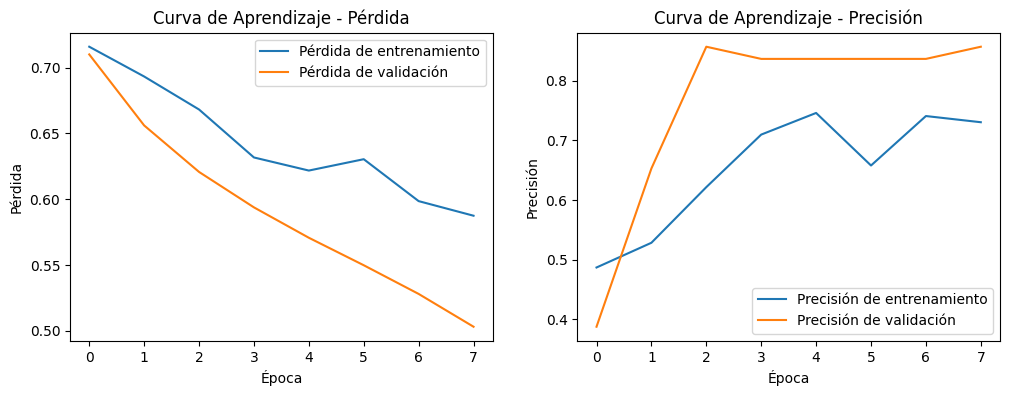

In [6]:
#   – Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

import matplotlib.pyplot as plt

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de Aprendizaje - Pérdida')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de Aprendizaje - Precisión')

plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

         0.0       0.86      0.64      0.73        28
         1.0       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



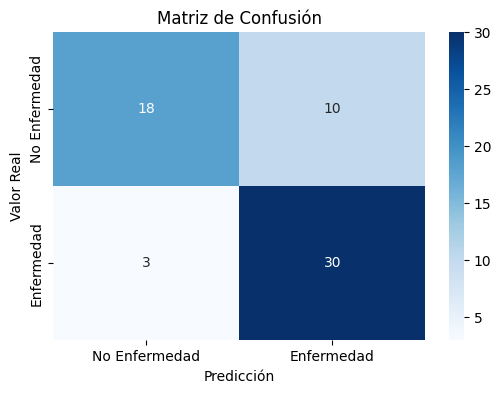

Conclusión:
El modelo MLP con dropout y early stopping muestra un rendimiento decente en el conjunto de prueba, con una precisión del 79%, recall del 79% y F1-score de 78%. La matriz de confusión indica un rendimiento moderado en ambas clases, mostrando que el modelo tiene cierta dificultad para predecir correctamente las personas sin enfermedad. La inclusión de técnicas de regularización como dropout y early stopping contribuyó a evitar el sobreajuste y la mejora del rendimiento general del modelo, si bien una precisión mayor al 80% en ambos grupos indicaría un modelo con mayor precisión.


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Obtener predicciones del modelo en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Enfermedad', 'Enfermedad'],
            yticklabels=['No Enfermedad', 'Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Conclusión
print("Conclusión:")
print("El modelo MLP con dropout y early stopping muestra un rendimiento decente en el conjunto de prueba, con una precisión del 79%, recall del 79% y F1-score de 78%. La matriz de confusión indica un rendimiento moderado en ambas clases, mostrando que el modelo tiene cierta dificultad para predecir correctamente las personas sin enfermedad. La inclusión de técnicas de regularización como dropout y early stopping contribuyó a evitar el sobreajuste y la mejora del rendimiento general del modelo, si bien una precisión mayor al 80% en ambos grupos indicaría un modelo con mayor precisión.")